## Modulos, bibliotecas e inicializações

In [3]:
import pandas as pd
import sweetviz as sv
import sklearn
from icecream import ic
import matplotlib.pyplot as plt
import seaborn as sns
import dtale as dt
import numpy as np
import warnings
from scipy import signal
import os.path

In [2]:
np.VisibleDeprecationWarning = DeprecationWarning

In [4]:
data_dir = os.path.join('.','aurorabp-sample-data-main/sample')

In [5]:
participants_df = pd.read_csv(os.path.join(data_dir, 'participants.tsv'), sep='\t')
features_df = pd.read_csv(os.path.join(data_dir, 'features.tsv'), sep='\t')
oscillometric_df = pd.read_csv(os.path.join(data_dir, 'measurements_oscillometric.tsv'), sep='\t')
auscultatory_df = pd.read_csv(os.path.join(data_dir, 'measurements_auscultatory.tsv'), sep='\t')

### Separando faixa de dados:

In [6]:

pid_count = 3
osci_count = 2
sampling_rate = 100
ppt_osci_df = oscillometric_df.loc[oscillometric_df.pid == participants_df.pid[pid_count]]
## carregar dataset do waveform
osci_series = ppt_osci_df.iloc[osci_count]

In [7]:
osci_series

pid                                                                 o003
phase                                                            initial
measurement                                               Sitting arm up
date_time                                            2018-01-01 09:34:48
sbp                                                                136.0
dbp                                                                 91.0
duration                                                            30.0
pressure_quality                                                   0.845
optical_quality                                                     0.88
waveform_file_path     measurements_oscillometric/o003/o003.initial.S...
waveforms_generated                                                    1
Name: 145, dtype: object

In [8]:
waveform_df = pd.read_csv(os.path.join(data_dir, osci_series.waveform_file_path), delimiter = '\t')

In [9]:
waveform_df

,t,ekg,optical,pressure,accel_x,accel_y,accel_z
0,0.000,127.00,-314880.0,2971.8,0.083936,-0.31427,0.97942
1,0.002,126.99,-314890.0,2971.6,0.085205,-0.31427,0.97903
2,0.004,126.95,-314890.0,2971.4,0.086474,-0.31427,0.97864
3,0.006,126.89,-314890.0,2971.1,0.087742,-0.31427,0.97824
4,0.008,126.91,-314890.0,2970.9,0.089011,-0.31427,0.97785
...,...,...,...,...,...,...,...
14995,29.990,125.32,-312610.0,2976.5,0.057096,-0.36014,0.95306
14996,29.992,125.27,-312610.0,2976.0,0.056608,-0.36034,0.95189
14997,29.994,125.18,-312600.0,2975.4,0.056120,-0.36053,0.95072
14998,29.996,125.19,-312590.0,2974.9,0.055632,-0.36073,0.94955


In [10]:
t = waveform_df['t']
ekg = waveform_df['ekg']
optical = waveform_df['optical']
pressure = waveform_df['pressure']
accelX = waveform_df['accel_x']
accelY = waveform_df['accel_y']
accelZ = waveform_df['accel_z']

# Análise visual 

In [45]:
def extremos_na_faixa(df, feature, tempo_col='t', inicio=0, fim=0):
 
    faixa_df = df[(df[tempo_col] >= inicio) & (df[tempo_col] <= fim)]

    max_linha = faixa_df.loc[faixa_df[feature].idxmax()]
    min_linha = faixa_df.loc[faixa_df[feature].idxmin()]

    print(f"Maximo de {feature}: {max_linha[feature]} em t = {max_linha[tempo_col]}")
    print(f"Minimo de {feature}: {min_linha[feature]} em t = {min_linha[tempo_col]}")
    
    return max_linha, min_linha


In [90]:
def buscar(df, feature, tempo=None, valor=None, tempo_col='t'):
    if tempo is not None:
        linha = df.iloc[(df[tempo_col] - tempo).abs().argmin()]
        print(f"Tempo: {linha[tempo_col]} - Valor {feature}: {linha[feature]}")
        return linha[feature]

    elif valor is not None:
        linha = df.iloc[(df[feature] - valor).abs().argmin()]
        print(f"Valor: {linha[feature]} - Tempo: {linha[tempo_col]}")
        return linha[tempo_col]

    else:
        return -1


#### EKG

Text(0, 0.5, 'EKG')

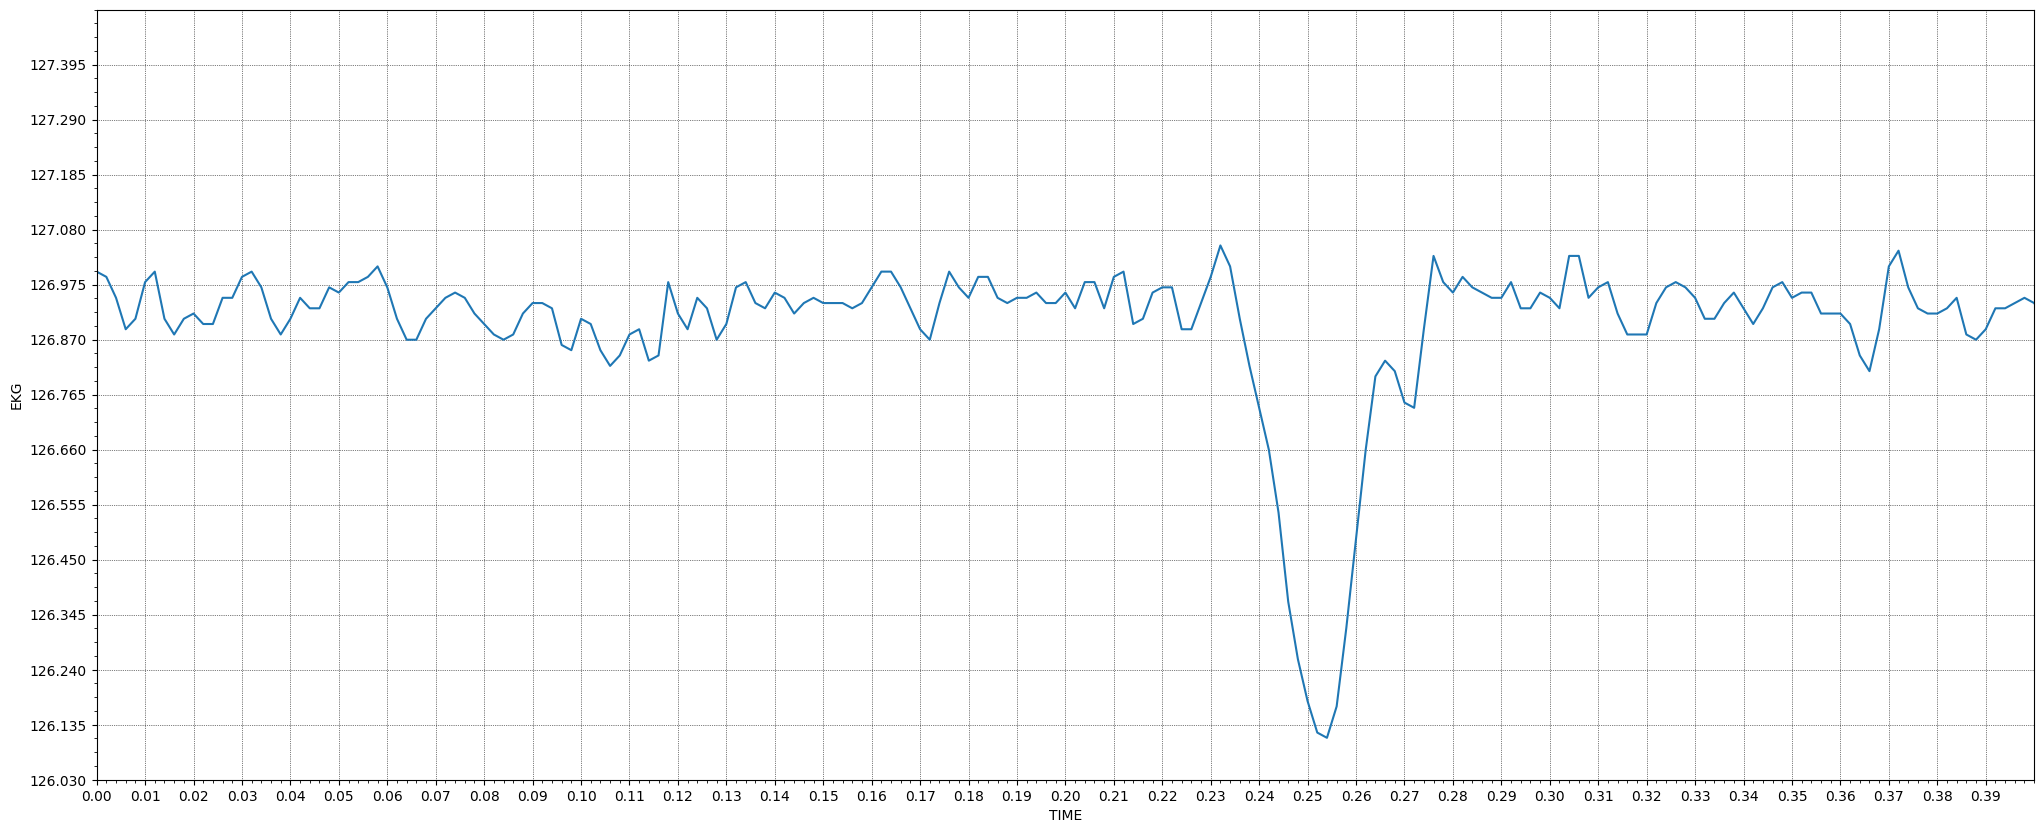

In [110]:
fig, axs = plt.subplots(1,1, figsize=(25, 10))
axs.plot(t, ekg)

axs.set_xlim(0, 0.4)
axs.set_ylim(126.03, 127.5)
axs.set_yticks(np.arange(126.03, 127.5, 0.105));
axs.set_xticks(np.arange(0.00, 0.40, 0.01));

#adicionando grades
axs.minorticks_on()
axs.grid(True, which='major' , color='black', linestyle=':', linewidth=0.5, axis='both')         

axs.set_xlabel("TIME")
axs.set_ylabel("EKG")



In [13]:
max_linha, min_linha = extremos_na_faixa(waveform_df, 'ekg', inicio=0.0, fim=0.4)


Maximo de ekg: 127.05 em t = 0.232
Minimo de ekg: 126.11 em t = 0.254


#### PRESSURE

Text(0, 0.5, 'PRESSURE')

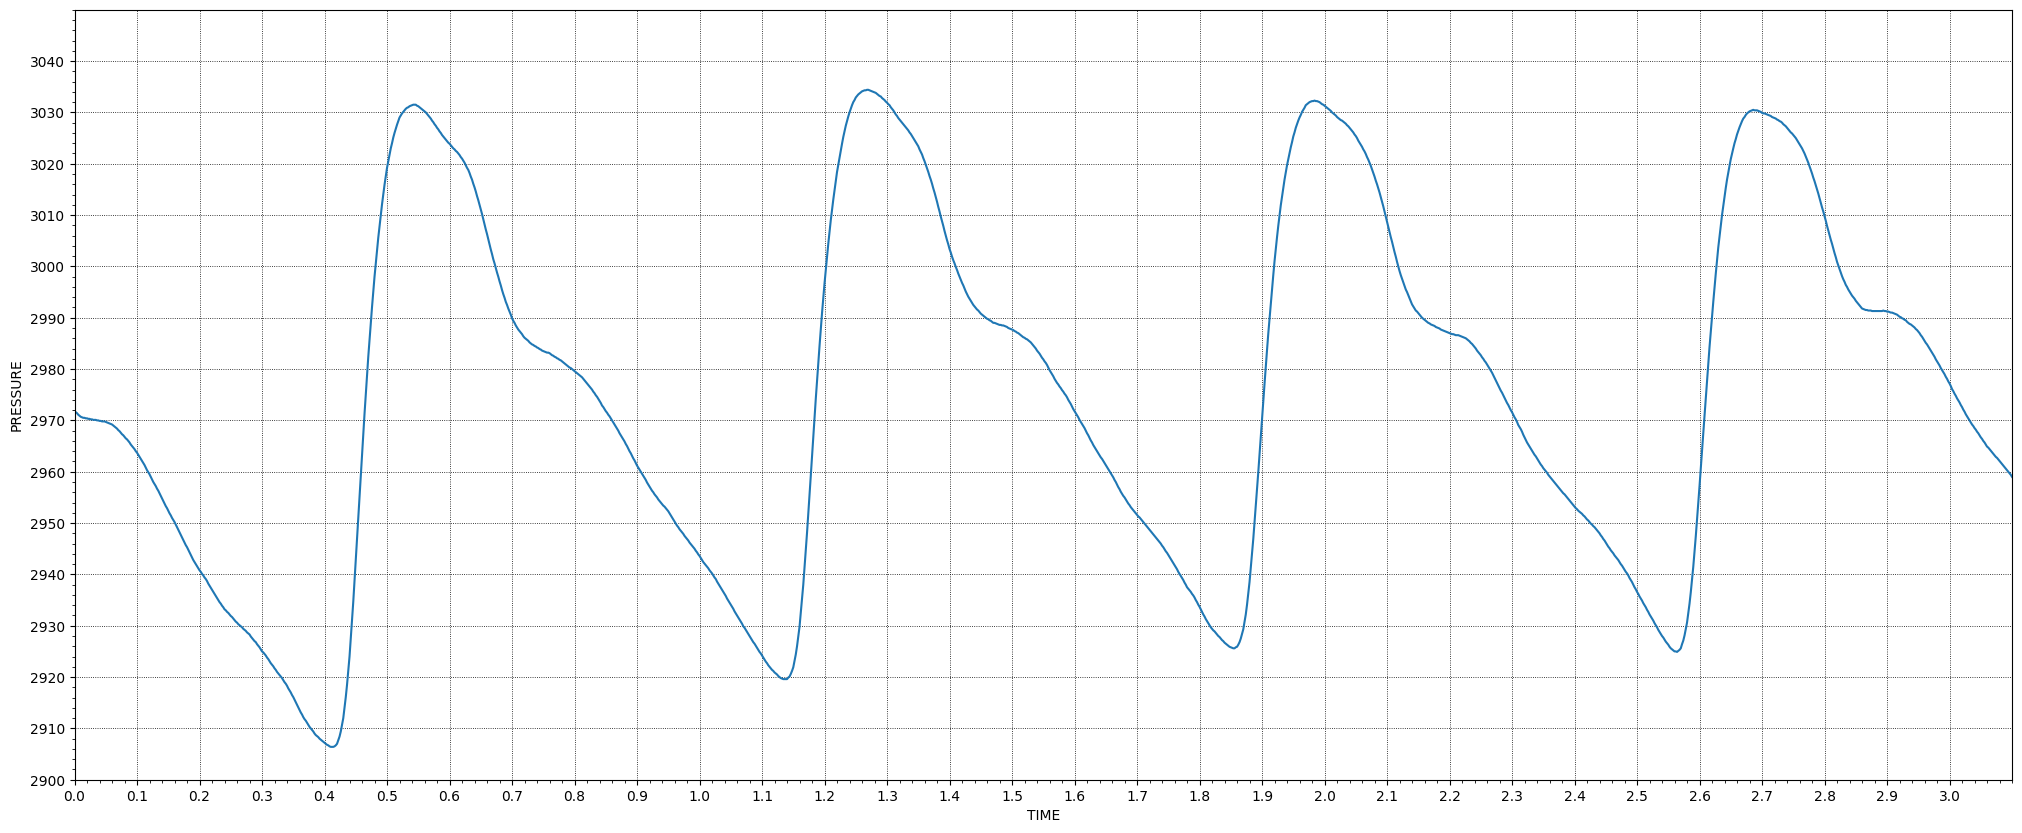

In [104]:
fig, axs = plt.subplots(1,1, figsize=(25, 10))
axs.plot(t, pressure)

axs.set_xlim(0,3.1)
axs.set_ylim(2900, 3050)
axs.set_yticks(np.arange(2900, 3050, 10));
axs.set_xticks(np.arange(0.00, 3.1, 0.1));

#adicionando grades
axs.minorticks_on()
axs.grid(True, which='major' , color='black', linestyle=':', linewidth=0.6, axis='both')         

axs.set_xlabel("TIME")
axs.set_ylabel("PRESSURE")

In [15]:
max_linha, min_linha = extremos_na_faixa(waveform_df, 'pressure', inicio=0.0, fim=7.1)

Maximo de pressure: 3039.8 em t = 4.09
Minimo de pressure: 2906.4 em t = 0.41


#### PPG / OPTICAL

Text(0, 0.5, 'OPTICAL')

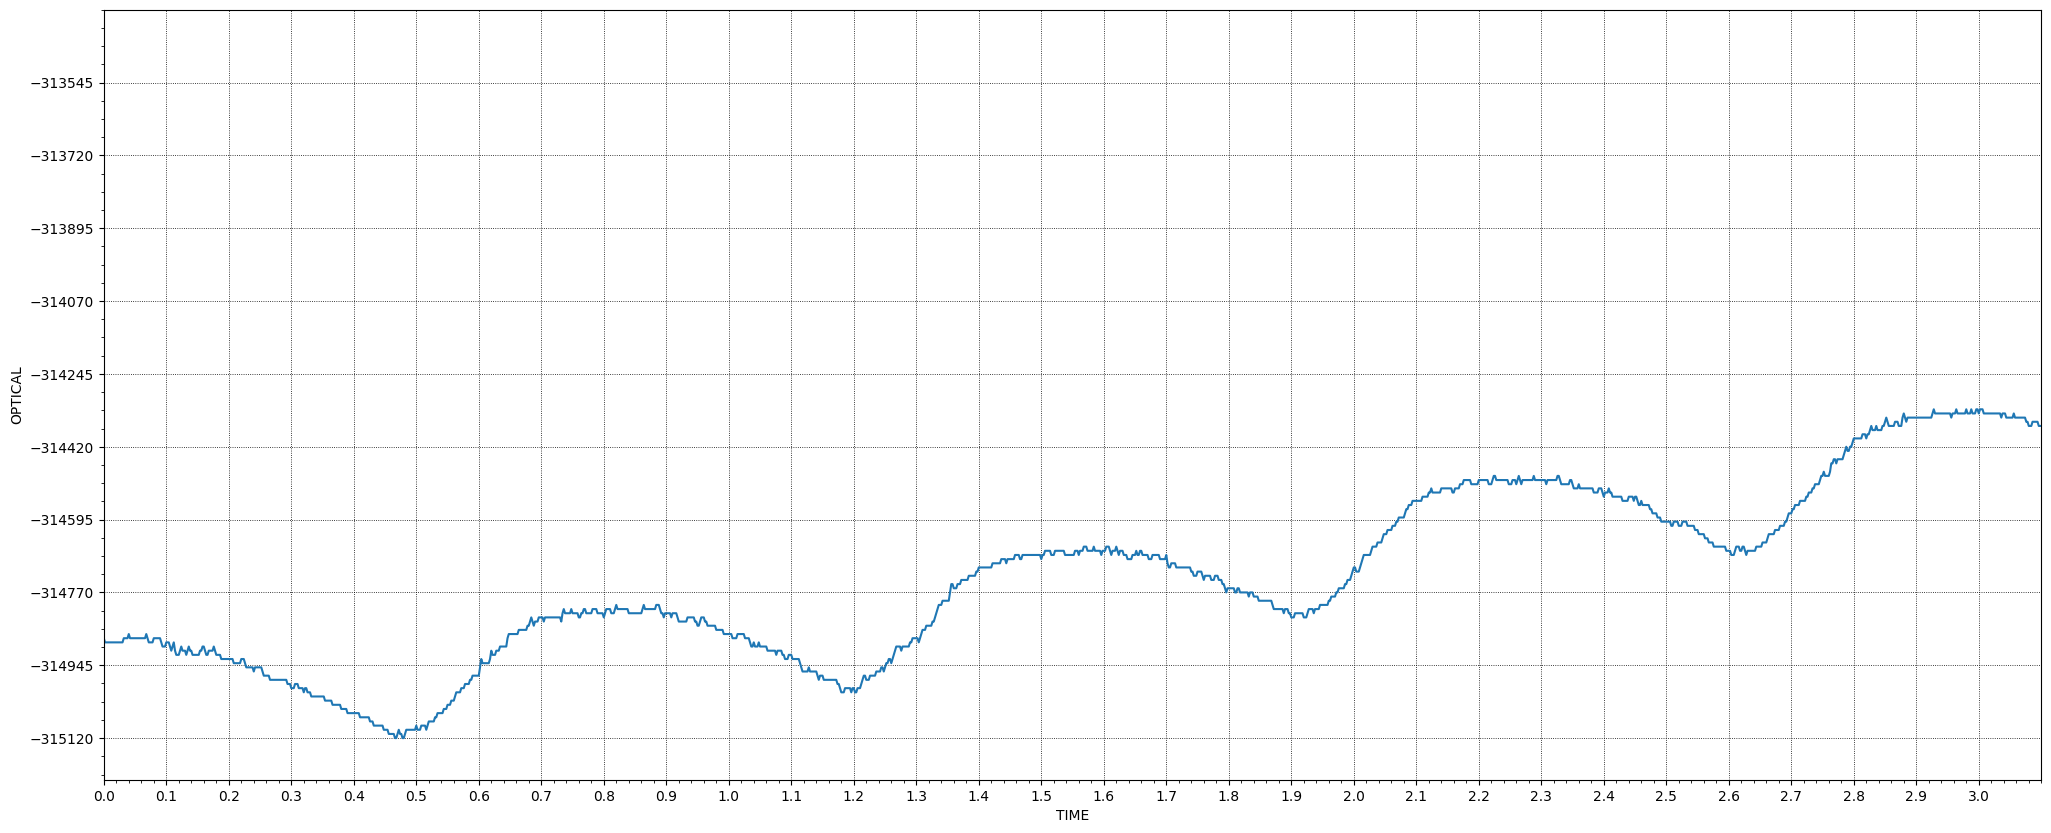

In [102]:
fig, axs = plt.subplots(1,1, figsize=(25, 10))
axs.plot(t, optical)
axs.set_xlim(0, 3.1)
axs.set_ylim(optical.min() - 100 , -313370)
axs.set_yticks(np.arange(optical.min(), -313370, 175));
axs.set_xticks(np.arange(0.00, 3.01, 0.1));

#adicionando grades
axs.minorticks_on()
axs.grid(True, which='major' , color='black', linestyle=':', linewidth=0.6, axis='both')         

axs.set_xlabel("TIME")
axs.set_ylabel("OPTICAL")

In [103]:
max_linha, min_linha = extremos_na_faixa(waveform_df, 'optical', inicio=0.0, fim=3.1)

Maximo de optical: -314330.0 em t = 2.928
Minimo de optical: -315120.0 em t = 0.466


#### ACELERAÇÃO DOS EIXOS NA TONOMETRIA

#####

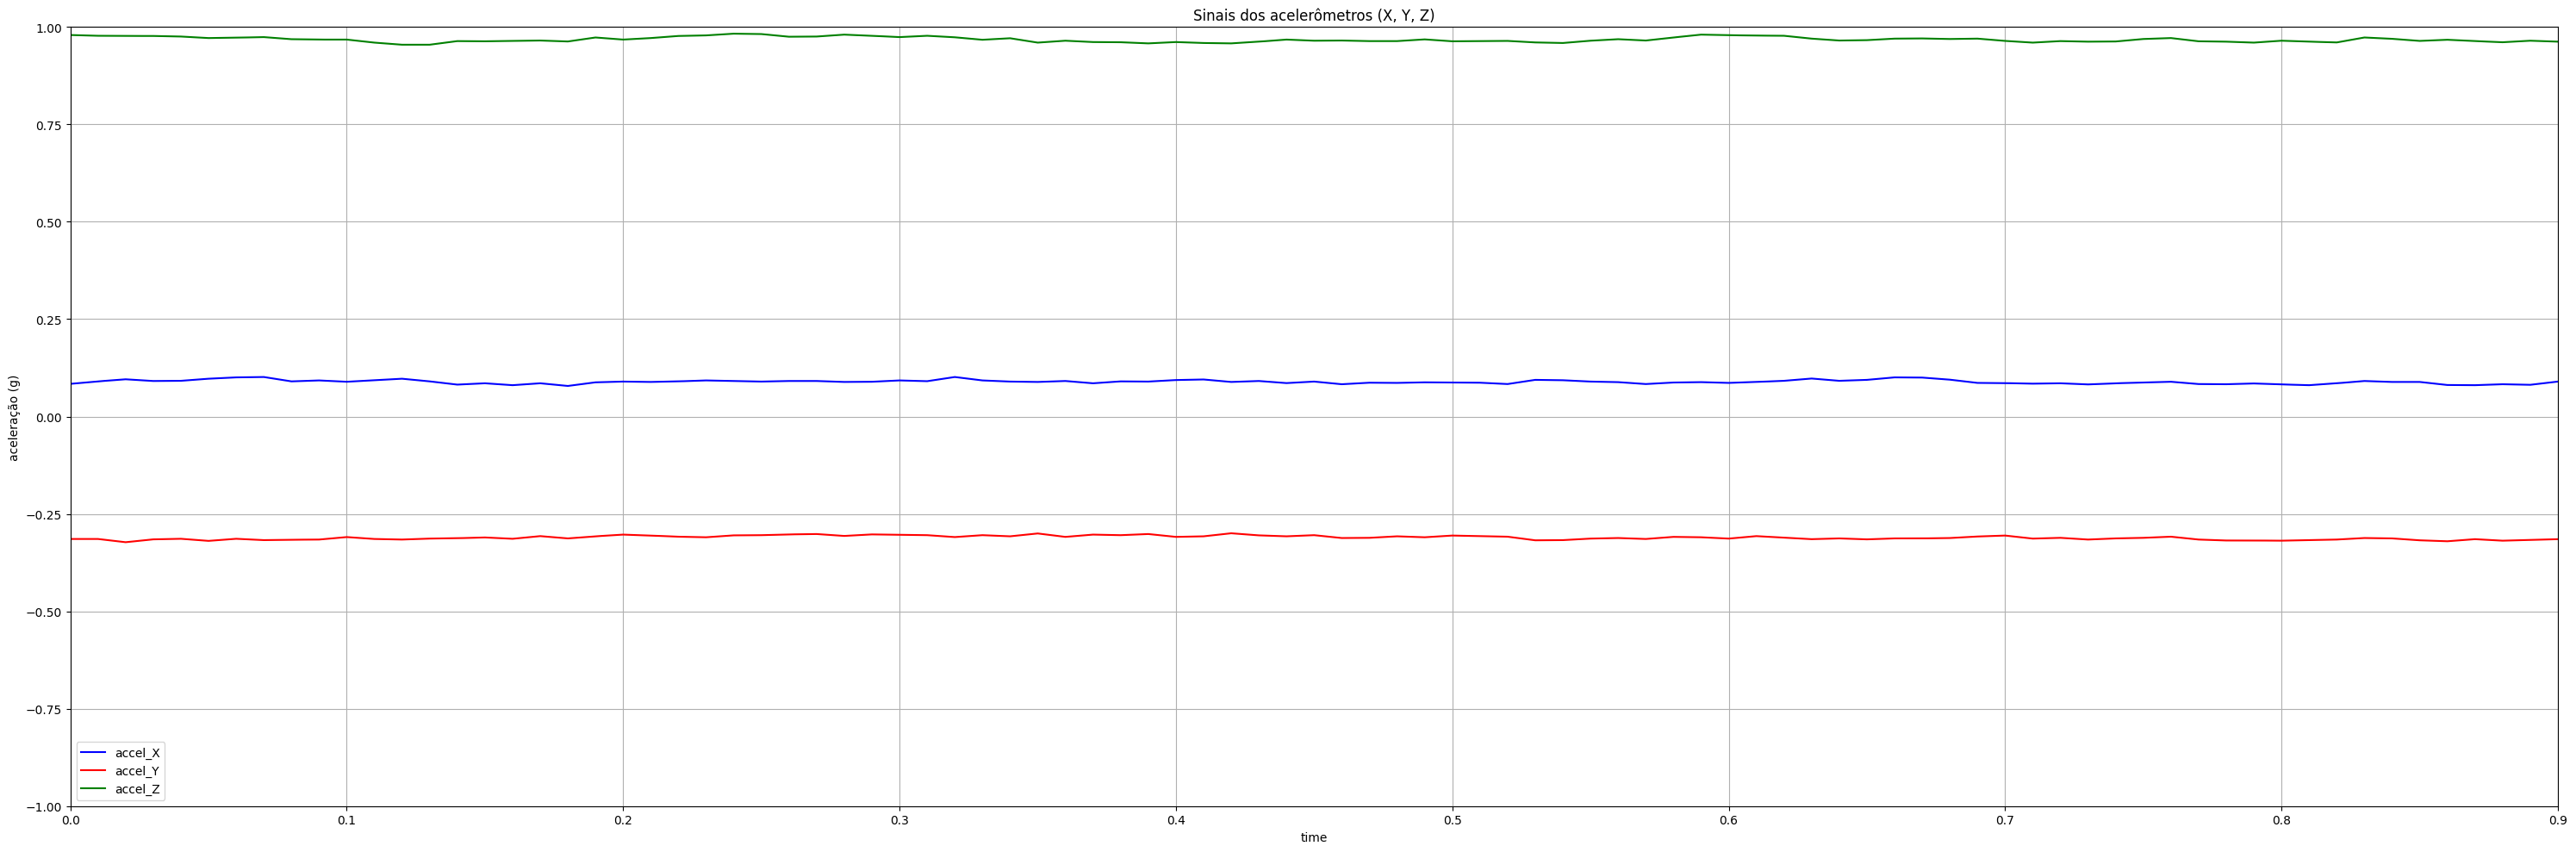

In [46]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(30, 10))

ax.plot(t, accelX, label='accel_X', color='blue')
ax.plot(t, accelY, label='accel_Y', color='red')
ax.plot(t, accelZ, label='accel_Z', color='green')

ax.set_xlim(0, 0.05)
ax.set_ylim(-1, 1)
ax.set_xticks(np.arange(0.00, 1, 0.1))

ax.set_xlabel("time")
ax.set_ylabel("aceleração (g)")
ax.set_title("Sinais dos acelerômetros (X, Y, Z)")

# Grid e legenda
ax.grid(True)
ax.legend()

plt.tight_layout()
plt.show()


In [ ]:
# terminar os graficos dos eixos
# ajustar os graficos para terem o mesmo tempo
# adicionar explicação conceitual
# fazer grafico ekg + ppg + pressure
    # estudar relação de ppg com pressure
    # correlacionar ppg com ekg

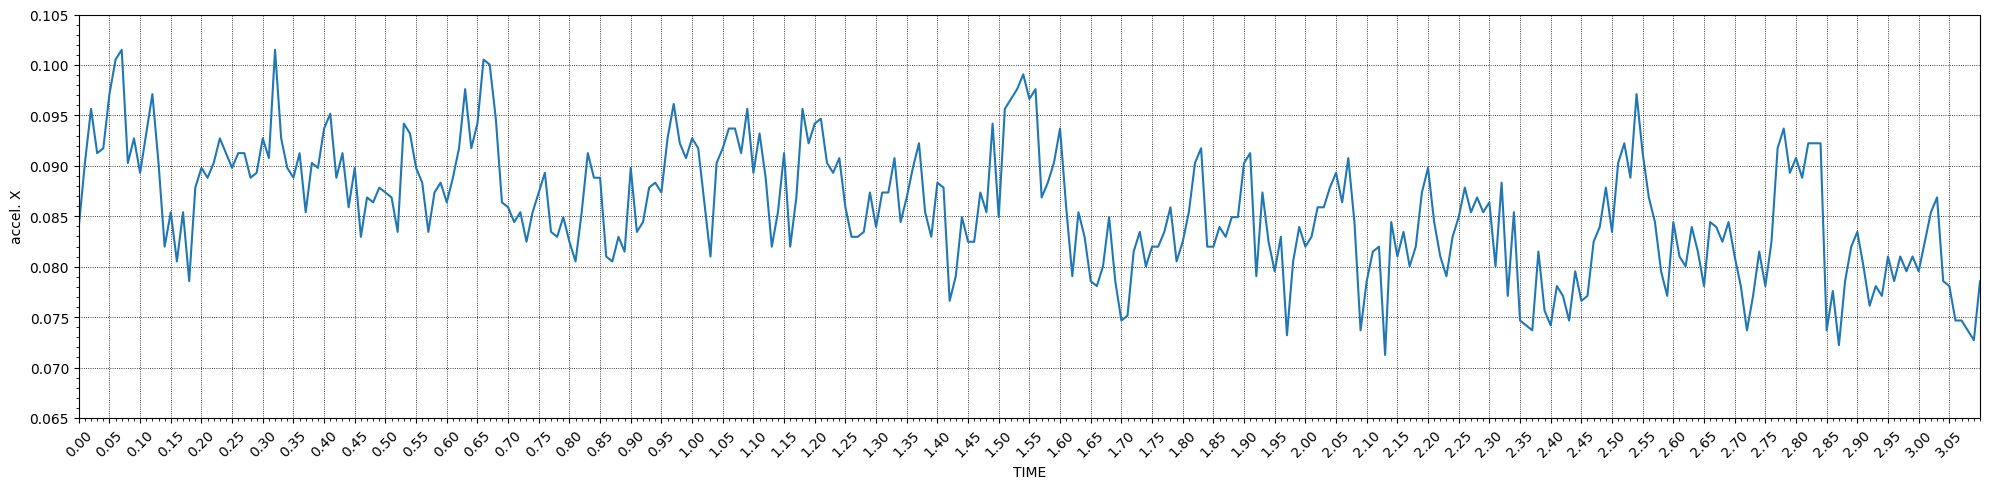

In [63]:
#-----------------------------------------EIXO X
fig, axs = plt.subplots(1, 1, figsize=(20,5))
axs.plot(t, accelX)
axs.set_xlim(0, 3.1)
axs.set_ylim(0.065, 0.105)
axs.set_xticks(np.arange(0, 3.1, 0.05));
axs.tick_params('x', labelrotation=45)
axs.set_xlabel("TIME")
axs.set_ylabel("accel. X")

axs.minorticks_on()
axs.grid(True, which = 'major', axis = 'both', color = 'black', linestyle=':', linewidth=0.6)

plt.tight_layout(w_pad = 0.02)

In [71]:
max_faixa, min_faixa = extremos_na_faixa(waveform_df, 'accel_x', inicio=0, fim=3.1)

Maximo de accel_x: 0.1015 em t = 0.07
Minimo de accel_x: 0.071248 em t = 2.13


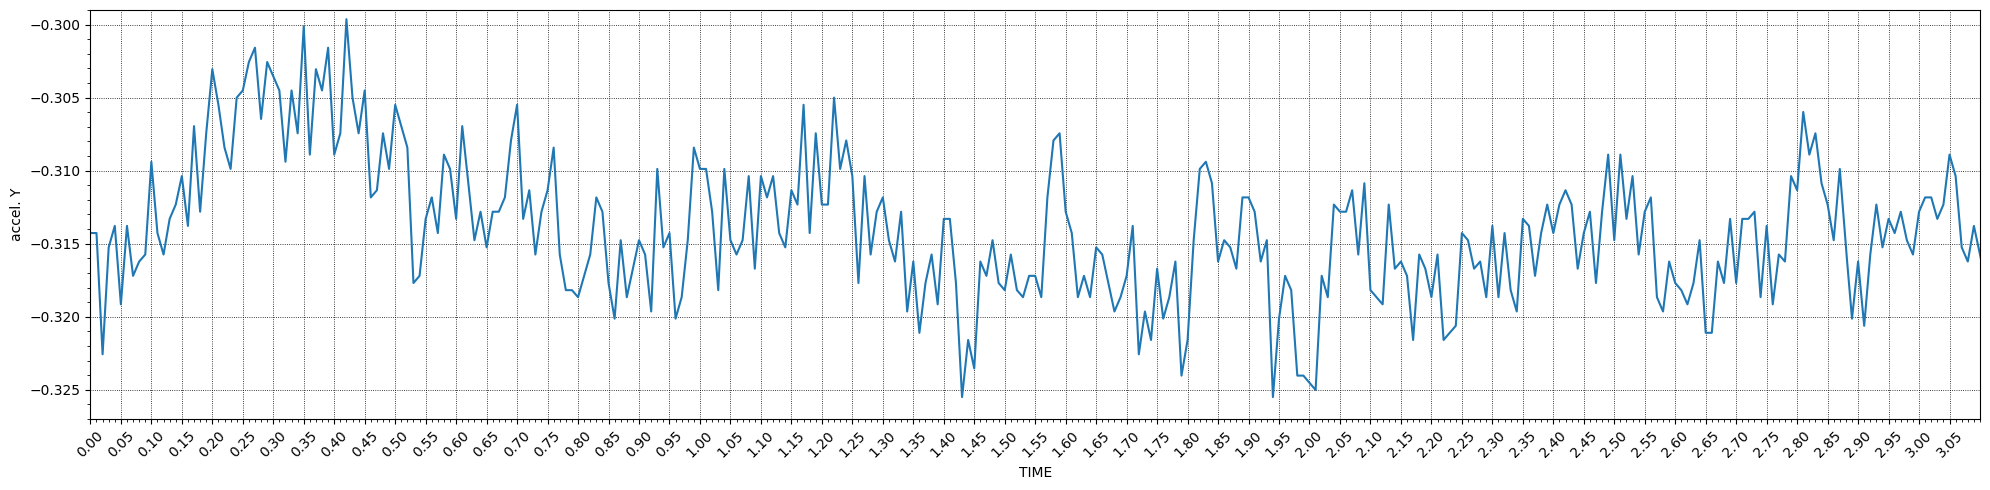

In [70]:
#-----------------------------------------EIXO Y
fig, axs = plt.subplots(1, 1, figsize=(20,5))
axs.plot(t, accelY)
axs.set_xlim(0, 3.1)
axs.set_ylim(-0.327, -0.299)
axs.set_xticks(np.arange(0, 3.1, 0.05));
axs.tick_params('x', labelrotation=45)
axs.set_xlabel("TIME")
axs.set_ylabel("accel. Y")

axs.minorticks_on()
axs.grid(True, which = 'major', axis = 'both', color = 'black', linestyle=':', linewidth=0.6)

plt.tight_layout(w_pad = 0.02)

In [72]:
max_faixa, min_faixa = extremos_na_faixa(waveform_df, 'accel_y', inicio=0, fim=3.1)

Maximo de accel_y: -0.29963 em t = 0.42
Minimo de accel_y: -0.3255 em t = 1.43


Text(0, 0.5, 'ACCEL Z')

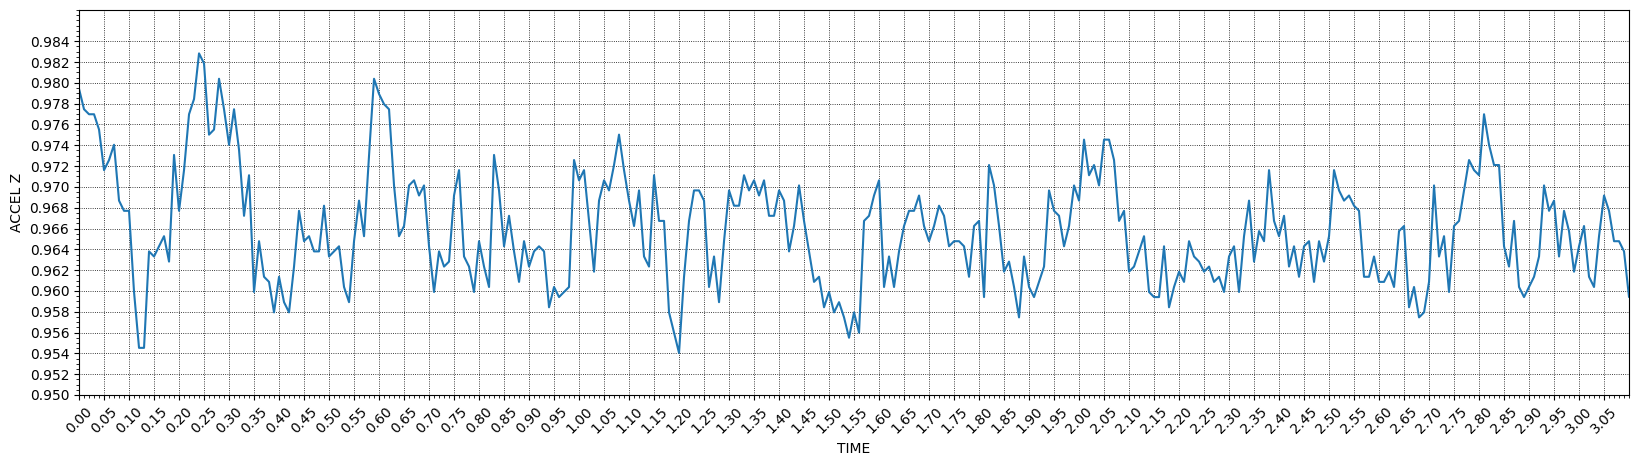

In [100]:
#-------------------------------------------------EIXO Z
fig, axs = plt.subplots(1, 1, figsize=(20,5))
axs.plot(t, accelZ)
axs.set_xlim(0, 3.1)
axs.set_ylim(0.952, 0.987)

axs.set_xticks(np.arange(0, 3.1, 0.05))
axs.set_yticks(np.arange(0.950, 0.985, 0.002))
axs.tick_params('x', labelrotation=45)
axs.minorticks_on()
axs.grid(True, which='major', axis='both', color ='black', linestyle=':', linewidth=0.6)

axs.set_xlabel("TIME")
axs.set_ylabel("ACCEL Z")


In [89]:
max_linha, min_linha = extremos_na_faixa(waveform_df, 'accel_z', inicio=0.0, fim=3.1)

Maximo de accel_z: 0.98283 em t = 0.24
Minimo de accel_z: 0.95404 em t = 1.2


In [101]:
valor = buscar(waveform_df, 'accel_z', tempo = 0)

Tempo: 0.0 - Valor accel_z: 0.97942
